<a href="https://colab.research.google.com/github/fbeber/CursoDataScience/blob/main/MachineLearning_Valida%C3%A7%C3%A3oDeModelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning

In [ ]:
!pip install graphviz==0.10
!apt-get install graphviz

!pip install seaborn==0.11.2
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"

dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}

dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_trocar = {
    'no' : 0,
    'yes' : 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head

<bound method NDFrame.head of       Unnamed: 0  milhas_por_ano  ano_do_modelo      preco  vendido
0              0           21801           2000   30941.02        1
1              1            7843           1998   40557.96        1
2              2            7109           2006   89627.50        0
3              3           26823           2015   95276.14        0
4              4            7935           2014  117384.68        1
...          ...             ...            ...        ...      ...
9995        9995           15572           2006   97112.86        0
9996        9996           13246           2002  107424.63        1
9997        9997           13018           2014   93856.99        0
9998        9998           10464           2011   51250.57        1
9999        9999           12362           1999   87945.73        0

[10000 rows x 5 columns]>

In [ ]:
dados.vendido.map(a_trocar)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: vendido, Length: 10000, dtype: float64

In [ ]:
from datetime import datetime
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [ ]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [ ]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano","ano_do_modelo"], axis=1)


dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [ ]:
x = dados [["preco", "idade_do_modelo", "km_por_ano"]]
y = dados ["vendido"]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi 46.88%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


##Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier()

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
dummy_stratified.score(teste_x, teste_y)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia do dummy stratified foi %.2f%%" % acuracia)

A acuracia do dummy stratified foi 46.88%


In [ ]:
from sklearn.dummy import DummyClassifier
dummy_mostfrequent = DummyClassifier()

dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia do dummy most frequent foi %.2f%%" % acuracia)

A acuracia do dummy most frequent foi 58.00%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)


print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma = 'auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi 77.48%


##Árvore de decisão

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)


print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#scaler = StandardScaler()
#scaler.fit(raw_treino_x)
#treino_x = scaler.transform(raw_treino_x)
#teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi 79.28%


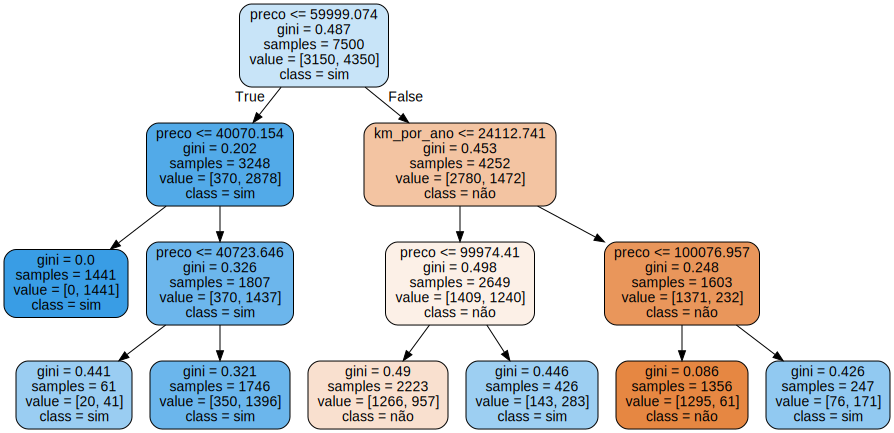

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ["não","sim"])
grafico = graphviz.Source(dot_data)
grafico

##Machine learning validação

In [ ]:
from sklearn.model_selection import cross_validate

SEED = 5
np.random.seed(SEED)
modelo = DecisionTreeClassifier (max_depth=2)
results = cross_validate(modelo, x, y, cv = 3, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 3 [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 3 [74.99, 76.57]


In [ ]:
from sklearn.model_selection import cross_validate

SEED = 5
np.random.seed(SEED)
modelo = DecisionTreeClassifier (max_depth=2)
results = cross_validate(modelo, x, y, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 [74.24, 77.32]


In [ ]:
from sklearn.model_selection import cross_validate

SEED = 5
np.random.seed(SEED)
modelo = DecisionTreeClassifier (max_depth=2)
results = cross_validate(modelo, x, y, cv = 5, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 5 [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 5 [75.21, 76.35]


##Aleatoriedade no cross validade

In [ ]:
def imprime_resultados(results):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  print("Accuracy médio: %.2f" % (media * 100))
  print("Accuracy intervalo: [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

In [ ]:
from sklearn.model_selection import KFold

SEED = 310
np.random.seed(SEED)

cv = KFold(n_splits = 10)
modelo = DecisionTreeClassifier (max_depth=2)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
#print("Accuracy com cross validation, 10 [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: [74.37, 77.19]


In [ ]:
SEED = 310
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True)
modelo = DecisionTreeClassifier (max_depth=2)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
#print("Accuracy com cross validation, 10 [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: [73.23, 78.33]


##Simular situacao horrivel de azar

In [ ]:
dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar [["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar ["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,16,24812.80412
5322,84843.49,0,17,23095.63834
5319,83100.27,0,23,36240.72746
5316,87932.13,0,20,32249.56426
5315,77937.01,0,19,28414.50704


In [ ]:
cv = KFold(n_splits = 10)
modelo = DecisionTreeClassifier (max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
#print("Accuracy com cross validation, 10 [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))
imprime_resultados(results)

Accuracy médio: 57.84
Accuracy intervalo: [34.29, 81.39]


In [ ]:
cv = KFold(n_splits = 10, shuffle=True)
modelo = DecisionTreeClassifier (max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
#print("Accuracy com cross validation, 10 [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))
imprime_resultados(results)

Accuracy médio: 75.76
Accuracy intervalo: [73.40, 78.12]


In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 10, shuffle=True)
modelo = DecisionTreeClassifier (max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score=False)
#media = results['test_score'].mean()
#desvio_padrao = results['test_score'].std()
#print("Accuracy com cross validation, 10 [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: [73.52, 78.04]


In [ ]:
dados.idade_do_modelo

0       22
1       24
2       16
3        7
4        8
        ..
9995    16
9996    20
9997     8
9998    11
9999    23
Name: idade_do_modelo, Length: 10000, dtype: int64

##Gerando dados aleatórios de modelo de carros para simulação de agrupamento ao usar nosso estimador

In [ ]:
np.random.seed(SEED)
dados["modelo"] = dados.idade_do_modelo + np.random.randint(-2, 3,size = 10000)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,22,35085.22134,24
1,40557.96,1,24,12622.05362,26
2,89627.50,0,16,11440.79806,15
3,95276.14,0,7,43167.32682,5
4,117384.68,1,8,12770.11290,6


In [ ]:
dados.modelo.unique()

array([24, 26, 15,  5,  6, 16, 21,  8, 23, 11, 18, 12,  7,  9, 20, 13, 17,
       25, 22, 19, 14, 10,  4,  3])

In [ ]:
abs(dados.modelo.min())

3

In [ ]:
dados.modelo.value_counts()

22    918
21    797
20    784
23    715
19    708
18    645
17    598
16    581
24    575
15    574
14    499
13    417
12    381
25    380
11    304
10    260
9     228
26    197
8     194
7     119
6      63
5      41
4      18
3       4
Name: modelo, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 10, shuffle=True)
modelo = DecisionTreeClassifier (max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score=False)
#media = results['test_score'].mean()
#desvio_padrao = results['test_score'].std()
#print("Accuracy com cross validation, 10 [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: [73.59, 77.97]


##Testando validação cruzada com GroupKFold

In [ ]:
from sklearn.model_selection import GroupKFold

SEED = 310
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier (max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.76
Accuracy intervalo: [74.44, 77.08]


##Cross Validation com Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x_escalado = scaler.transform(treino_x)
teste_x_escalado = scaler.transform(teste_x)

modelo = SVC()
modelo.fit(treino_x_escalado, treino_y)
previsoes = modelo.predict(teste_x_escalado)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % acuracia)



A acuracia foi 77.48%


In [ ]:
from sklearn.model_selection import GroupKFold

SEED = 310
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = SVC()
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 77.18
Accuracy intervalo: [74.89, 79.46]


In [ ]:
scaler = StandardScaler()
scaler.fit(x_azar)
x_azar_escalado = scaler.transform(x_azar)

In [ ]:
x_azar_escalado

array([[ 0.3636103 , -0.39591706,  0.24651152],
       [ 0.79214444, -0.18257669,  0.03346607],
       [ 0.72310419,  1.09746554,  1.66435195],
       ...,
       [ 0.17822399, -0.60925743, -0.73405662],
       [ 0.2248779 ,  0.45744443, -0.39741686],
       [-1.34266351,  0.88412517,  1.52099053]])

In [ ]:
from sklearn.model_selection import GroupKFold

SEED = 310
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = SVC()
results = cross_validate(modelo, x_azar_escalado, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 76.73
Accuracy intervalo: [74.85, 78.60]


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
SEED = 310
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()
pipeline = Pipeline([('transformacao', scaler), ('estimador', modelo)])
pipeline


cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 76.74
Accuracy intervalo: [74.84, 78.63]


In [ ]:

np.random.seed(SEED)
modelo = SVC()
modelo.fit(x,  y)


SVC()

##Testando Parametros

In [ ]:
def roda_arvore_de_decisao (max_depth):


  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100,
  test_score =  results['test_score'].mean() * 100
  
  print("max_depth = %d, treino = %2.f, teste = %.2f" % (max_depth, results['train_score'].mean() * 100, results['test_score'].mean() * 100))
  tabela = [max_depth, train_score,test_score]
  #imprime_resultados(results)
  return tabela


resultados = [roda_arvore_de_decisao(i) for i in range (1,33)]
resultados = pd.DataFrame(resultados, columns= ["max_depth","train","test"])
resultados.head()

max_depth = 1, treino = 76, teste = 75.76
max_depth = 2, treino = 76, teste = 75.76
max_depth = 3, treino = 79, teste = 78.66
max_depth = 4, treino = 79, teste = 78.65
max_depth = 5, treino = 79, teste = 78.53
max_depth = 6, treino = 79, teste = 78.45
max_depth = 7, treino = 79, teste = 78.30
max_depth = 8, treino = 80, teste = 78.01
max_depth = 9, treino = 80, teste = 77.76
max_depth = 10, treino = 81, teste = 77.28
max_depth = 11, treino = 82, teste = 76.74
max_depth = 12, treino = 83, teste = 76.50
max_depth = 13, treino = 84, teste = 75.96
max_depth = 14, treino = 85, teste = 75.50
max_depth = 15, treino = 86, teste = 75.22
max_depth = 16, treino = 87, teste = 75.05
max_depth = 17, treino = 88, teste = 74.48
max_depth = 18, treino = 89, teste = 74.58
max_depth = 19, treino = 90, teste = 74.18
max_depth = 20, treino = 91, teste = 73.92
max_depth = 21, treino = 92, teste = 73.54
max_depth = 22, treino = 93, teste = 73.32
max_depth = 23, treino = 93, teste = 73.43
max_depth = 24, trei

,max_depth,train,test
0,1,"(75.79219497907893,)",75.757567
1,2,"(75.79219497907893,)",75.757567
2,3,"(78.75556930317241,)",78.661119
3,4,"(78.7888982598169,)",78.650925
4,5,"(78.95895068861998,)",78.530868


In [ ]:
import seaborn as sns

##OVERFIT - Perfeito para treino e ruim para teste

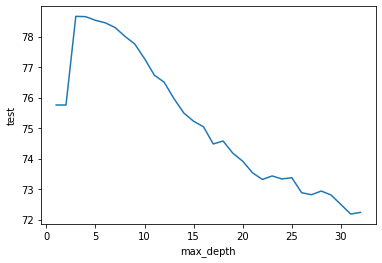

In [ ]:
#sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)

In [ ]:
#sns.lineplot(x = "max_depth", y = "train", data = resultados)

In [ ]:
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
2,3,"(78.75556930317241,)",78.661119
3,4,"(78.7888982598169,)",78.650925
4,5,"(78.95895068861998,)",78.530868
5,6,"(79.17440485518365,)",78.449577
6,7,"(79.47007602384116,)",78.295061


#Explorando hiperparametros em 2 dimensoes

In [ ]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 32, treino = 75.79, teste = 75.76
Arvore max_depth = 1, min_samples_leaf = 64, treino = 75.79, teste = 75.76
Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.76
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.76
Arvore max_depth = 2, min_samples_leaf = 32, treino = 75.79, teste = 75.76
Arvore max_depth = 2, min_samples_leaf = 64, treino = 75.79, teste = 75.76
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.76
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.76
Arvore max_depth = 3, min_samples_leaf = 32, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 64, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 32, treino = 78.76, teste = 78.66
Arvore max_depth = 

,max_depth,min_samples_leaf,train,test
0,1,32,75.792195,75.757567
1,1,64,75.792195,75.757567
2,1,128,75.792195,75.757567
3,1,256,75.792195,75.757567
4,2,32,75.792195,75.757567


In [ ]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
10,3,128,78.752243,78.671323
15,4,256,78.752243,78.671323
14,4,128,78.752243,78.671323
8,3,32,78.752243,78.671323
9,3,64,78.752243,78.671323


In [ ]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,0.541597,0.008916
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.405286,0.293593
train,5.415965e-01,-4.052862e-01,1.000000,0.230263
test,8.915951e-03,2.935930e-01,0.230263,1.000000


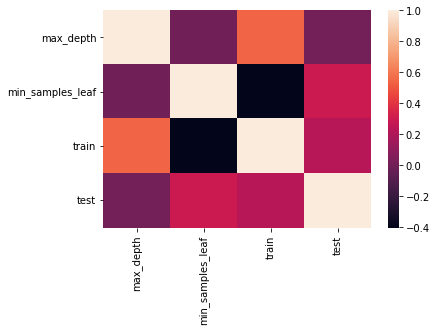

In [ ]:
sns.heatmap(corr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc78453e1d0>,
      dtype=object)

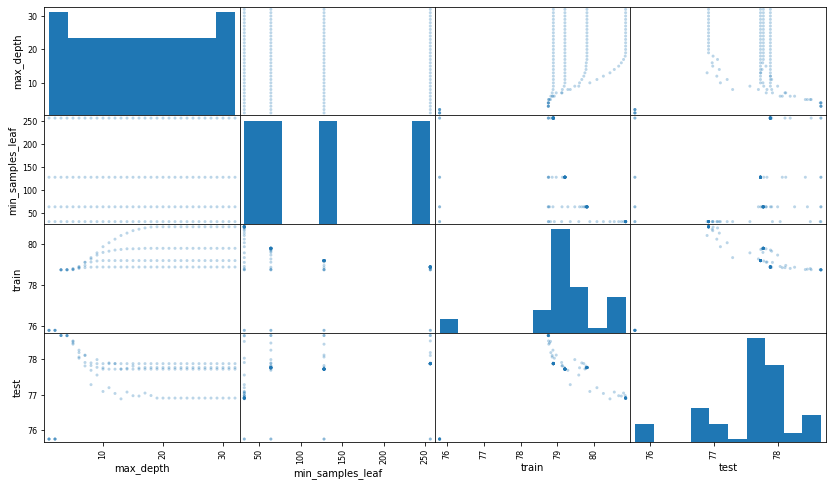

In [ ]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

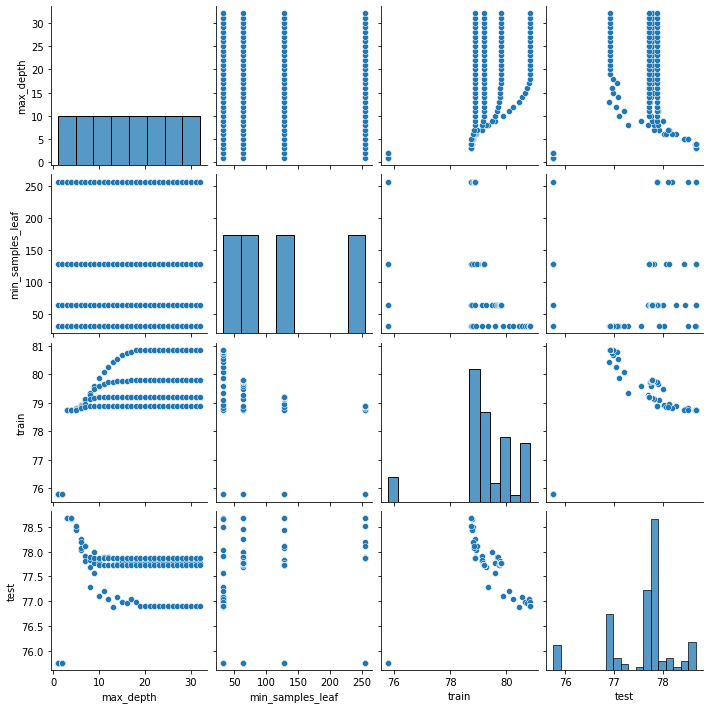

In [ ]:
sns.pairplot(resultados)

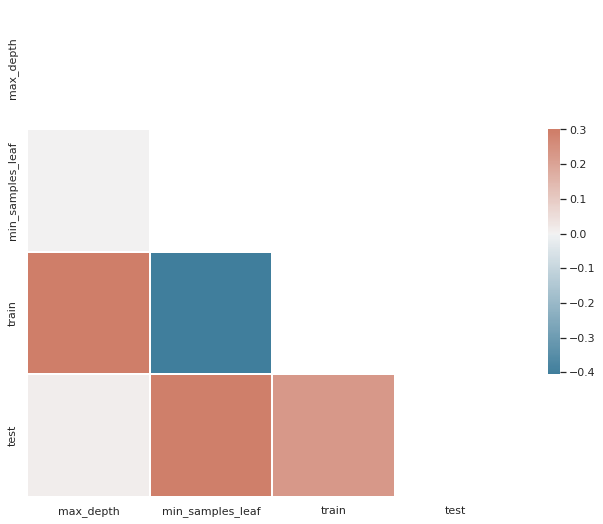

In [ ]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.76
Arvore max_depth = 1, min_samples_leaf = 192, treino = 75.79, teste = 75.76
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.76
Arvore max_depth = 1, min_samples_leaf = 512, treino = 75.79, teste = 75.76
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.76
Arvore max_depth = 2, min_samples_leaf = 192, treino = 75.79, teste = 75.76
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.76
Arvore max_depth = 2, min_samples_leaf = 512, treino = 75.79, teste = 75.76
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 192, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 512, treino = 77.53, teste = 77.51
Arvore max_depth = 4, min_samples_leaf = 128, treino = 78.75, teste = 78.67
Arvore max_d

,max_depth,min_samples_leaf,train,test
0,1,128,75.792195,75.757567
1,1,192,75.792195,75.757567
2,1,256,75.792195,75.757567
3,1,512,75.792195,75.757567
4,2,128,75.792195,75.757567


In [ ]:
corr = resultados.corr()

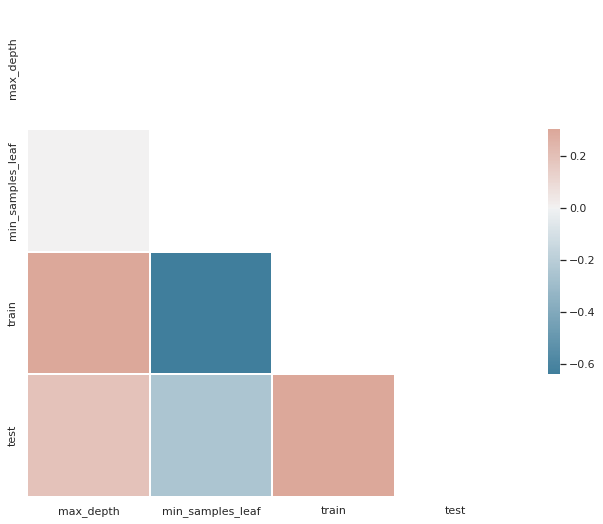

In [ ]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
8,3,128,78.752243,78.671323
9,3,192,78.752243,78.671323
10,3,256,78.752243,78.671323
12,4,128,78.752243,78.671323
13,4,192,78.752243,78.671323


##Explorando 3 dimensoes de hiperparametros

In [ ]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train","test","fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.792195,75.757567,0.007636,0.002445
1,1,32,64,75.792195,75.757567,0.006913,0.002362
2,1,32,128,75.792195,75.757567,0.006739,0.002109
3,1,32,256,75.792195,75.757567,0.006501,0.002221
4,1,64,32,75.792195,75.757567,0.006714,0.002169


In [ ]:
corr = resultados.corr()

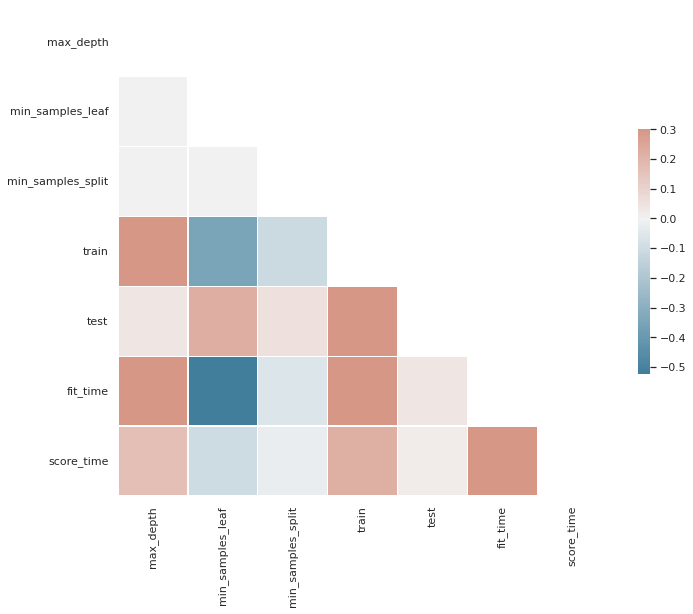

In [ ]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
62,4,256,128,78.752243,78.671323,0.012584,0.002033
59,4,128,256,78.752243,78.671323,0.013076,0.002197
57,4,128,64,78.752243,78.671323,0.014280,0.002583
56,4,128,32,78.752243,78.671323,0.013958,0.002537
55,4,64,256,78.752243,78.671323,0.013553,0.002437


##Explorando espaço de parametros com GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011336,0.000629,0.002160,0.000365,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78785,...,0.777336,0.788066,0.763636,0.782209,0.789796,0.800403,0.787512,0.786713,0.010284,1
1,0.012016,0.001456,0.002384,0.000511,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78785,...,0.777336,0.788066,0.763636,0.782209,0.789796,0.800403,0.787512,0.786713,0.010284,1
2,0.011701,0.001867,0.002067,0.000203,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78785,...,0.777336,0.788066,0.763636,0.782209,0.789796,0.800403,0.787512,0.786713,0.010284,1
3,0.011697,0.000981,0.002224,0.000360,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78785,...,0.777336,0.788066,0.763636,0.782209,0.789796,0.800403,0.787512,0.786713,0.010284,1
4,0.011701,0.001004,0.002089,0.000171,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78785,...,0.777336,0.788066,0.763636,0.782209,0.789796,0.800403,0.787512,0.786713,0.010284,1


In [ ]:
print(busca.best_params_)
print(busca.best_score_ *100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67132298966102


In [ ]:
melhor = busca.best_estimator_

In [ ]:
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [ ]:

from sklearn.metrics import accuracy_score

## evitar abordagem pois estará otimista


predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 78.75%


##Como ter estimativa sem esse vicio nos dados?

No caso de cross validation com busca de hiperparametros, fazemos uma nova validaçao cruzada (nested)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups = dados.modelo)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

## Como o pandas nao suporta nested validation com group k fold nao é possivel prever o resultado

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012480,0.003005,0.002661,0.000139,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.011790,0.001961,0.002778,0.000407,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.010964,0.000275,0.002682,0.000186,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.010759,0.000611,0.002494,0.000098,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.010603,0.000409,0.002426,0.000056,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [ ]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std()
  print("Accuracy médio: %.2f" % (media * 100))
  print("Accuracy intervalo: [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

In [ ]:
imprime_score(scores)

Accuracy médio: 7867.00
Accuracy intervalo: [7864.64, 7869.36]


In [ ]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


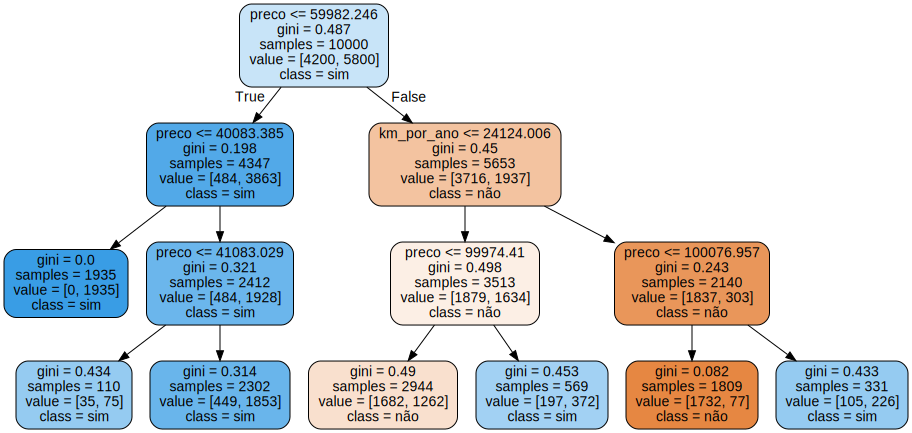

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
features = x.columns
dot_data = export_graphviz(melhor, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ["não","sim"])
grafico = graphviz.Source(dot_data)
grafico

#Buca aleatorio - Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros, 
                    n_iter = 16,
                    cv = KFold(n_splits = 5),
                          random_state = SEED)


busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013743,0.000571,0.002283,0.000055,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.4330,0.4525,0.771,0.742,0.7725,0.6342,0.156817,1
1,0.010078,0.000064,0.002181,0.000038,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.4015,0.4165,0.771,0.766,0.7725,0.6255,0.176848,11
2,0.010362,0.000495,0.002411,0.000394,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.4015,0.4165,0.771,0.766,0.7725,0.6255,0.176848,11
3,0.019485,0.000432,0.002297,0.000037,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.4240,0.4535,0.771,0.750,0.7445,0.6286,0.155544,5
4,0.021439,0.003482,0.003258,0.001527,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.4240,0.4535,0.771,0.750,0.7445,0.6286,0.155544,5


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)

Accuracy médio: 7841.00
Accuracy intervalo: [7838.64, 7843.36]


In [ ]:
 melhor = busca.best_estimator_
 print(melhor)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=128, min_samples_split=128)


In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.634 +-(0.314) {'min_samples_split': 128, 'min_samples_leaf': 128, 'max_depth': 5, 'criterion': 'gini'}
0.634 +-(0.312) {'min_samples_split': 128, 'min_samples_leaf': 128, 'max_depth': 5, 'criterion': 'entropy'}
0.634 +-(0.312) {'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 5, 'criterion': 'entropy'}
0.629 +-(0.313) {'min_samples_split': 64, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'gini'}
0.629 +-(0.311) {'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'entropy'}
0.629 +-(0.311) {'min_samples_split': 64, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'entropy'}
0.629 +-(0.311) {'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'entropy'}
0.626 +-(0.353) {'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy'}
0.626 +-(0.353) {'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 3, 'criterion': 'entropy'}
0.626 +-(0.353) {'min_samples_split': 64, 'min

#Exploracao mais a fundo aleatoria

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros, 
                    n_iter = 16,
                    cv = KFold(n_splits = 5),
                          random_state = SEED)


busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019781,0.000676,0.004163,0.000355,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.4330,0.4525,0.771,0.742,0.7725,0.6342,0.156817,1
1,0.014564,0.000413,0.003499,0.000171,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.4015,0.4165,0.771,0.766,0.7725,0.6255,0.176848,11
2,0.014664,0.000559,0.003653,0.000182,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.4015,0.4165,0.771,0.766,0.7725,0.6255,0.176848,11
3,0.029600,0.001115,0.004053,0.000475,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.4240,0.4535,0.771,0.750,0.7445,0.6286,0.155544,5
4,0.031424,0.003742,0.003768,0.000270,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.4240,0.4535,0.771,0.750,0.7445,0.6286,0.155544,5


#Comparando GridSearchCV com RandomizedSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time 

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time()
busca = GridSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)



resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 226.33 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043153,0.001935,0.005278,0.000158,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7560,0.7490,0.7850,0.7450,0.7619,0.015357,130
1,0.376081,0.009861,0.025748,0.001484,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7655,0.7555,0.7945,0.7850,0.7625,0.7726,0.014685,93
2,0.043134,0.003253,0.005100,0.000042,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7780,0.7635,0.7835,0.7845,0.7560,0.7731,0.011373,89
3,0.370286,0.013736,0.024832,0.000861,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7425,0.7550,0.7950,0.7850,0.7620,0.7679,0.019356,119
4,0.038530,0.001542,0.004805,0.000206,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7405,0.7485,0.7760,0.7630,0.7607,0.014250,135


In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.780 +-(0.020) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.020) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.778 +-(0.030) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.027) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.033) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 100}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros, 
                    n_iter = 20,
                    cv = KFold(n_splits = 5, shuffle = True),
                          random_state = SEED)


busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time 

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter=20,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)



resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 37.68 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.819003,0.087397,0.043628,0.002404,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7740,0.7925,0.7775,0.7560,0.7742,0.011724,10
1,0.100085,0.007099,0.008589,0.000386,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.750,0.7785,0.7820,0.7785,0.7645,0.7707,0.011969,13
2,0.753778,0.131450,0.034072,0.006819,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7745,0.7930,0.7785,0.7585,0.7751,0.011178,6
3,0.041235,0.002133,0.004819,0.000189,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.750,0.7600,0.7450,0.7390,0.7520,0.7492,0.007026,20
4,0.064369,0.006629,0.005342,0.000361,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.771,0.7740,0.7635,0.7370,0.7585,0.7608,0.013094,18


In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.776 +-(0.025) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.023) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.024) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +-(0.032) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.775 +-(0.035) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}


In [ ]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo 124.28 segundos
Accuracy médio: 7755.00
Accuracy intervalo: [7752.64, 7757.36]
RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=32,
                       min_samples_split=32)


#Se eu não consigo ou não posso usar o cross validation